#**MOVIE RECOMMENDATION SYSTEM**
CS419M Course Project \
\
For this task, we utilized following 3 approaches: 
1. Collaborative Filtering 
2. Content-based Filtering 
3. Demographic Filtering 

The code for each of them is listed below

#Demographic filtering

Demographic filtering is a technique used in recommender technique which recommends movies taking into consideration the general popularity of a movie.Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.(But that's the best u can do when u know nothing in specific about the user,this is typically the case with new subscribers) \
So,first lets go through the aspects of demographic filtering 

###![](https://makesmarttv.net/wp-content/uploads/2014/10/netflix_more_movies.jpg)

So,lets get started we will try doing something like the NETFLIX demographic filtering shown above

We would try recommending the top 10 highly rated films,top 10 most popular films etc.

Followed by more specific recommendations like top 10 of each genre(comedy,action,children&family movies etc.),followed by 5 best movies of popular actors

This doesn't involve any machine learning(though ML techniques would be extensively used in content-based & collaborative filtering) but is mainly about capitalizing on the critical stats from the TMDB ratings data

Thus,demographic filtering is about giving crude recommendation knowing nothing about the viewer(which is the case for most new subscribers to NETFLIX or other streaming platforms)





##Importing libraries and a peek into the dataset

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
movies=pd.read_csv("/content/drive/MyDrive/movies_data/tmdb_5000_movies.csv/tmdb_5000_movies.csv")
credits=pd.read_csv("/content/drive/MyDrive/movies_data/tmdb_5000_credits.csv/tmdb_5000_credits.csv")
print(movies.shape,credits.shape)

(4803, 20) (4803, 4)


In [23]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [24]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Lets make note of the key features in both datsets:

1)genres

2)cast

3)popularity

2)average rating

3)number of votes

##Data-preprocessing

Lets make the things simple by discarding all other features and merging both the datasets

###Merging the datsets

In [25]:
#rename movie-id to id so as to merge both on the id
credits.rename(columns={"movie_id":"id"},inplace=True)
print(credits.columns)

Index(['id', 'title', 'cast', 'crew'], dtype='object')


In [26]:
movies= movies.merge(credits,on='id')
print(movies.shape)
movies.columns

(4803, 23)


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

Having merged both datasets let's discard the less useful features

In [27]:
relevant_cols=["id","title_x","genres","popularity","vote_average","vote_count","cast"]
movies=movies.loc[:,relevant_cols]
movies.shape

(4803, 7)

In [28]:
movies.rename(columns={"title_x":"title","vote_average":"rating"},inplace=True)
movies.columns

Index(['id', 'title', 'genres', 'popularity', 'rating', 'vote_count', 'cast'], dtype='object')

###The data in genres and cast columns are strings,let's attempt to understand them and process these data into lists of genres and actors respectively

In [29]:
#Lets pick row 100 and analyse its genres & cast columns
row_id=100
print(movies.loc[row_id,"title"])
print(movies.loc[row_id,"genres"],'\n',movies.loc[row_id,"cast"])

The Curious Case of Benjamin Button
[{"id": 14, "name": "Fantasy"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}, {"id": 9648, "name": "Mystery"}, {"id": 10749, "name": "Romance"}] 
 [{"cast_id": 4, "character": "Daisy", "credit_id": "52fe43e2c3a36847f807632b", "gender": 1, "id": 112, "name": "Cate Blanchett", "order": 0}, {"cast_id": 5, "character": "Benjamin Button", "credit_id": "52fe43e2c3a36847f807632f", "gender": 2, "id": 287, "name": "Brad Pitt", "order": 1}, {"cast_id": 6, "character": "Elizabeth Abbott", "credit_id": "52fe43e2c3a36847f8076333", "gender": 1, "id": 3063, "name": "Tilda Swinton", "order": 2}, {"cast_id": 10, "character": "Caroline", "credit_id": "52fe43e2c3a36847f8076343", "gender": 1, "id": 15887, "name": "Julia Ormond", "order": 3}, {"cast_id": 7, "character": "Daisy Age 7", "credit_id": "52fe43e2c3a36847f8076337", "gender": 1, "id": 18050, "name": "Elle Fanning", "order": 4}, {"cast_id": 183, "character": "Daisy Age 10", "credit_id": "56ec883a92

In [30]:
#The genre and cast are string type first lets make functions to convert them to dictionaries
def process_genre(s):
  id_str=s.split(", ")[0]
  genre_str=s.split(", ")[-1]
  genre={}
  genre["id"]=int(id_str.split(':')[-1])
  genre["name"]=(genre_str.split(':')[-1])[2:-1]
  return genre

def get_genres(s):
  if(len(s)<5):
    return {}
  genres=s.split("}, {")
  genres[0]=genres[0][2:]
  genres[-1]=genres[-1][:-2]
  genre_list=[]
  for genre in genres:
    genre_list.append(process_genre(genre))
  return genre_list

def process_actor(s):
  id_str=s.split(", ")[0]
  actor_str=s.split(", ")[-2]
  actor={}
  actor["id"]=int(id_str.split(':')[-1])
  actor["name"]=(actor_str.split(':')[-1])[2:-1]
  return actor

def get_cast(s):
  if(len(s)<5):
    return {}
  cast=s.split("}, {")
  cast[0]=cast[0][2:]
  cast[-1]=cast[-1][:-2]
  cast_list=[]
  for actor in cast:
    cast_list.append(process_actor(actor))
  return cast_list

In [31]:
#Lets test these functions
import random
row_id=int(random.random()*movies.shape[0]//1)      #choose a random movie
print(movies.loc[row_id,"title"])
Genres=get_genres(movies.loc[row_id,"genres"])
print("GENRES")
for idx,genre in enumerate(Genres):
  print((idx+1),':',genre)
Cast=get_cast(movies.loc[row_id,"cast"])
print("CAST")
for idx,actor in enumerate(Cast):
  print((idx+1),':',actor)

Changeling
GENRES
1 : {'id': 80, 'name': 'Crime'}
2 : {'id': 18, 'name': 'Drama'}
3 : {'id': 9648, 'name': 'Mystery'}
CAST
1 : {'id': 6, 'name': 'Angelina Jolie'}
2 : {'id': 7, 'name': 'Jeffrey Donovan'}
3 : {'id': 8, 'name': 'John Malkovich'}
4 : {'id': 9, 'name': 'Geoff Pierson'}
5 : {'id': 10, 'name': 'Amy Ryan'}
6 : {'id': 11, 'name': 'Gattlin Griffith'}
7 : {'id': 12, 'name': 'Michelle Gunn'}
8 : {'id': 18, 'name': 'Frank Wood'}
9 : {'id': 21, 'name': 'Colm Feore'}
10 : {'id': 24, 'name': 'Michael Kelly'}
11 : {'id': 25, 'name': "Denis O'Hare"}
12 : {'id': 35, 'name': 'Jeffrey Hutchinson'}
13 : {'id': 37, 'name': 'Devon Conti'}
14 : {'id': 38, 'name': 'Peter Breitmayer'}
15 : {'id': 39, 'name': 'Antonia Bennett'}
16 : {'id': 40, 'name': 'Erica Grant'}
17 : {'id': 41, 'name': 'Jan Devereaux'}
18 : {'id': 42, 'name': 'Kerri Randles'}
19 : {'id': 43, 'name': 'Morgan Eastwood'}
20 : {'id': 44, 'name': 'Ric Sarabia'}
21 : {'id': 45, 'name': 'Debra Christofferson'}
22 : {'id': 46, 'name

Seems to be working fine

##Data visualization

Text(0, 0.5, 'Vote count')

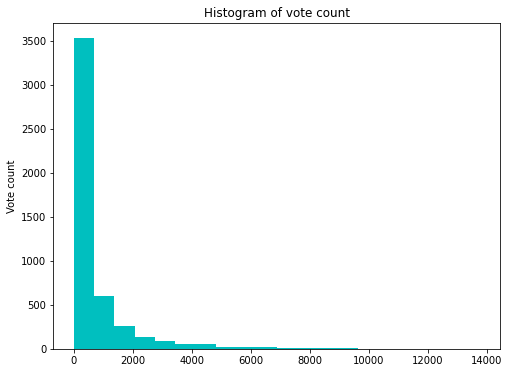

In [32]:
plt.figure(figsize=(8,6))
plt.hist(movies['vote_count'],bins=20,color='c')
plt.title("Histogram of vote count")
plt.ylabel("Vote count")

Thus,most of the movies have less than 1000 rating votes

Text(0.5, 1.0, 'popularity v/s ratings')

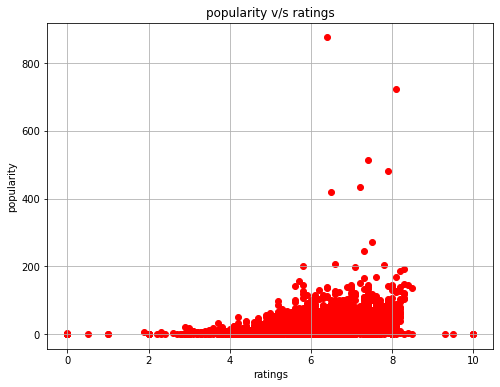

In [33]:
plt.figure(figsize=(8,6))
plt.grid(2)
plt.scatter(movies["rating"],movies["popularity"],c='r')
plt.xlabel("ratings")
plt.ylabel("popularity")
plt.title("popularity v/s ratings")

There is a positive correlation between ratings and popularity

##Demographic filtering

###Top 10 most popular movies

In [34]:
#Lets look at movies with vote_count greater than the 90th percentile or quantile
#As others aren't really popular and their popularity score is most likely subject to high variance
threshold_vote= movies['vote_count'].quantile(0.9)
print(threshold_vote)
#Basically the 90th quantile of vote_count 

1838.4000000000015


Now lets look at the top 10 movies with highest popularity among movies with vote_count greater than the threshold

In [35]:
popular_picks=list(movies[movies['vote_count']>threshold_vote].nlargest(10,'popularity').loc[:,'title'])
movies[movies['vote_count']>threshold_vote].nlargest(10,'popularity')

,id,title,genres,popularity,rating,vote_count,cast
546,211672,Minions,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",875.581305,6.4,4571,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil..."
95,157336,Interstellar,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",724.247784,8.1,10867,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ..."
788,293660,Deadpool,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",514.569956,7.4,10995,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D..."
94,118340,Guardians of the Galaxy,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",481.098624,7.9,9742,"[{""cast_id"": 1, ""character"": ""Peter Quill / St..."
127,76341,Mad Max: Fury Road,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",434.278564,7.2,9427,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""..."
28,135397,Jurassic World,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",418.708552,6.5,8662,"[{""cast_id"": 10, ""character"": ""Owen Grady"", ""c..."
199,22,Pirates of the Caribbean: The Curse of the Bla...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",271.972889,7.5,6985,"[{""cast_id"": 12, ""character"": ""Captain Jack Sp..."
82,119450,Dawn of the Planet of the Apes,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",243.791743,7.3,4410,"[{""cast_id"": 8, ""character"": ""Caesar"", ""credit..."
200,131631,The Hunger Games: Mockingjay - Part 1,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",206.227151,6.6,5584,"[{""cast_id"": 2, ""character"": ""Katniss Everdeen..."
88,177572,Big Hero 6,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",203.734590,7.8,6135,"[{""cast_id"": 23, ""character"": ""Baymax (voice)""..."


###Top 10 highest rated movies

Now lets look at the top 10 movies with highest rating among movies with vote_count greater than the threshold

In [36]:
top_rated=list(movies[movies['vote_count']>threshold_vote].nlargest(10,'rating').loc[:,'title'])
movies[movies['vote_count']>threshold_vote].nlargest(10,'rating')

,id,title,genres,popularity,rating,vote_count,cast
1881,278,The Shawshank Redemption,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",136.747729,8.5,8205,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ..."
3337,238,The Godfather,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",143.659698,8.4,5893,"[{""cast_id"": 5, ""character"": ""Don Vito Corleon..."
662,550,Fight Club,"[{""id"": 18, ""name"": ""Drama""}]",146.757391,8.3,9413,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""..."
1818,424,Schindler's List,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",104.469351,8.3,4329,"[{""cast_id"": 14, ""character"": ""Oskar Schindler..."
2294,129,Spirited Away,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",118.968562,8.3,3840,"[{""cast_id"": 3, ""character"": ""Chihiro (voice)""..."
2731,240,The Godfather: Part II,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",105.792936,8.3,3338,"[{""cast_id"": 8, ""character"": ""Don Michael Corl..."
3232,680,Pulp Fiction,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",121.463076,8.3,8428,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""..."
3865,244786,Whiplash,"[{""id"": 18, ""name"": ""Drama""}]",192.528841,8.3,4254,"[{""cast_id"": 5, ""character"": ""Andrew Neimann"",..."
65,155,The Dark Knight,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",187.322927,8.2,12002,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""..."
690,497,The Green Mile,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...",103.698022,8.2,4048,"[{""cast_id"": 4, ""character"": ""Paul Edgecomb"", ..."


###Top movies in different genres

In [37]:
def check_genre(top_genre,genres):
  for genre in genres:
    if(genre["name"]==top_genre):
      return True
  return False

top_genre={}
#Let's look at common genres & let's recommend 3 movies for each genres
allGenres={}
for row_id in range(movies.shape[0]):
  genres=get_genres(movies.loc[row_id,"genres"])
  for genre in genres:
    if genre["name"] in allGenres.keys():
      allGenres[genre["name"]]+=1
    else:
      allGenres[genre["name"]]=1

#If say there are over 10% movies of a particluar genre let's call that a common genre
#for each common genre let's choose top 3 based on the ratings

for key,val in allGenres.items():
  if(val>movies.shape[0]/10):
    top_genre[key]=[]

for genre in top_genre.keys():
  top_in_genre=[]
  for row_id in range(movies.shape[0]):
    if(check_genre(genre,get_genres(movies.loc[row_id,"genres"]))):
      if(len(top_in_genre)<3):
        top_in_genre.append((row_id,movies.loc[row_id,"rating"]))
      else:
        if(top_in_genre[-1][1]<movies.loc[row_id,"rating"]):
          top_in_genre.pop()
          top_in_genre.append((row_id,movies.loc[row_id,"rating"]))
      sorted(top_in_genre,key=lambda x:x[1],reverse=True)
  top_genre[genre].append(movies.loc[top_in_genre[2][0],"title"])
  top_genre[genre].append(movies.loc[top_in_genre[1][0],"title"])
  top_genre[genre].append(movies.loc[top_in_genre[0][0],"title"])

Lets visualize the number of movies in each genre

Text(0.5, 1.0, 'Number of movies in each genre')

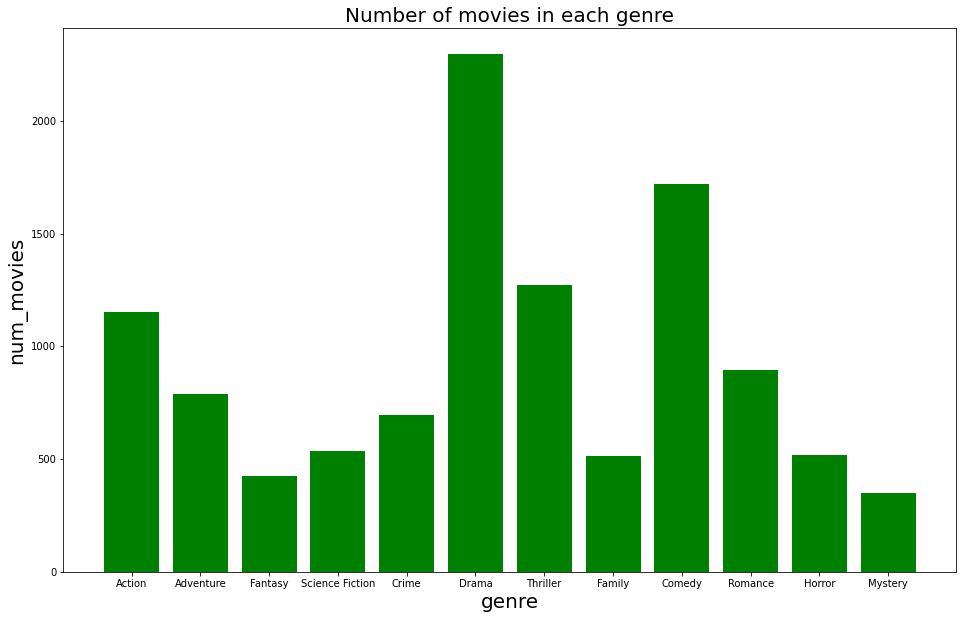

In [38]:
X=[]
y=[]
for genre,n_movies in allGenres.items():
  if(n_movies>300):
    X.append(genre)
    y.append(n_movies)
plt.figure(figsize=(16,10))
plt.bar(X,y,color='green')
plt.xlabel("genre",fontsize=20)
plt.ylabel("num_movies",fontsize=20)
plt.title("Number of movies in each genre",fontsize=20)

Most of the movies are drama,comedy and all others have substantial number of movies

###Top movies of popular actors

In [39]:
def check_actor(top_actor,cast):
  for actor in cast:
    if(actor["name"]==top_actor):
      return True
  return False

top_actors={}
#Let's look at 10 top actors(based on number of movies they were a part of) & let's recommend 2 movies for each actor
allActors={}
for row_id in range(movies.shape[0]):
  cast=get_cast(movies.loc[row_id,"cast"])
  for actor in cast:
    if actor["name"] in allActors.keys():
      allActors[actor["name"]]+=1
    else:
      allActors[actor["name"]]=1

allActors.pop('.')    #remove all movies without caste
top_actors_list=[i[0] for i in sorted(allActors.items(),key=lambda x:x[1],reverse=True)[:10]]

for actor in top_actors_list:
  top_actors[actor]=[]

for actor in top_actors.keys():
  top_in_actor=[]
  for row_id in range(movies.shape[0]):
    if(check_actor(actor,get_cast(movies.loc[row_id,"cast"]))):
      if(len(top_in_actor)<3):
        top_in_actor.append((row_id,movies.loc[row_id,"rating"]))
      else:
        if(top_in_actor[-1][1]<movies.loc[row_id,"rating"]):
          top_in_actor.pop()
          top_in_actor.append((row_id,movies.loc[row_id,"rating"]))
      sorted(top_in_actor,key=lambda x:x[1],reverse=True)
  top_actors[actor].append(movies.loc[top_in_actor[1][0],"title"])
  top_actors[actor].append(movies.loc[top_in_actor[0][0],"title"])

##Final demographic recommendations

In [40]:
print("***POPULAR PICKS***")
for idx,movie in enumerate(popular_picks):
  print(idx+1,movie)
print('\n',"****TOP RATED****")
for idx,movie in enumerate(top_rated):
  print(idx+1,movie)
print('\n',"**BEST ACROSS GENRES**")
for genre,movies in top_genre.items():
  print("------>",genre)
  for idx,movie in enumerate(movies):
    print(idx+1,movie)
print('\n',"**MOVIES OF TOP ACTORS**")
for actor,movies in top_actors.items():
  print("------>",actor)
  for idx,movie in enumerate(movies):
    print(idx+1,movie)

***POPULAR PICKS***
1 Minions
2 Interstellar
3 Deadpool
4 Guardians of the Galaxy
5 Mad Max: Fury Road
6 Jurassic World
7 Pirates of the Caribbean: The Curse of the Black Pearl
8 Dawn of the Planet of the Apes
9 The Hunger Games: Mockingjay - Part 1
10 Big Hero 6

 ****TOP RATED****
1 The Shawshank Redemption
2 The Godfather
3 Fight Club
4 Schindler's List
5 Spirited Away
6 The Godfather: Part II
7 Pulp Fiction
8 Whiplash
9 The Dark Knight
10 The Green Mile

 **BEST ACROSS GENRES**
------> Action
1 One Man's Hero
2 Pirates of the Caribbean: At World's End
3 Avatar
------> Adventure
1 The Prisoner of Zenda
2 Pirates of the Caribbean: At World's End
3 Avatar
------> Science Fiction
1 The Empire Strikes Back
2 John Carter
3 Avatar
------> Crime
1 The Shawshank Redemption
2 The Dark Knight Rises
3 Spectre
------> Drama
1 Dancer, Texas Pop. 81
2 King Kong
3 The Dark Knight Rises
------> Thriller
1 Pulp Fiction
2 Quantum of Solace
3 The Dark Knight Rises
------> Family
1 Dancer, Texas Pop. 8

#Collaborative filtering

Collaborative filtering looks at similarity between users instead of focusing on similarity of content like content based filtering \
For example: 2 users have given similar ratings to a few movies,so we can recommend movies rated highly by one person to another

##Importing libraries and a loading the dataset


In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install surprise
#Surprise is a library with tools like singular-value decomposition,KNN for recommender systems
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import KNNBaseline
from surprise import SVD
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
#Enter the appropriate file path for the datasets
movies=pd.read_csv("/content/drive/MyDrive/movies_data/tmdb_5000_movies.csv/tmdb_5000_movies.csv")
credits=pd.read_csv("/content/drive/MyDrive/movies_data/tmdb_5000_credits.csv/tmdb_5000_credits.csv")
#rename movie-id to id so as to merge both on the id
credits.rename(columns={"movie_id":"id"},inplace=True)
movies= movies.merge(credits,on='id')
relevant_cols=["id","title_x","genres","popularity","vote_average","vote_count","cast"]
movies=movies.loc[:,relevant_cols]
movies.rename(columns={"title_x":"title","vote_average":"rating"},inplace=True)
ratings=pd.read_csv("/content/drive/MyDrive/movies_data/ratings_small.csv")
ratings.head()

     |████████████████████████████████| 11.8 MB 4.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630174 sha256=0d9f7aa30221e3b332c1b19c04d03537e13a869dbc635ad23c4d327bb613aea7
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Basically the ratings dataset has ratings of each user for the movies he has watched and we attempt to predict the ratings he would give to unseen movies by using singular value decomposition or KNN

In [43]:
print("The total number of ratings is:",ratings.shape[0])

The total number of ratings is: 100004


Basically,each user has assigned ratings to movies he had watched &there is a timestamp to understand which movie was viewed first

In [44]:
print("The number of unique viewers is:",ratings.describe().loc["max","userId"])

The number of unique viewers is: 671.0


In [45]:
print("Average ratings per viewer:",ratings.shape[0]/ratings.describe().loc["max","userId"])

Average ratings per viewer: 149.03725782414307


###Lets visualize the number of user ratings for each movie

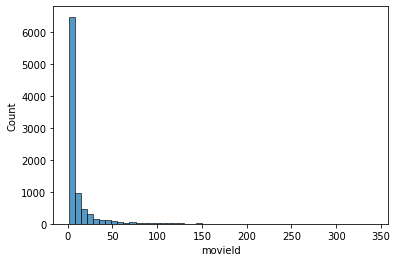

In [46]:
sns.histplot(ratings["movieId"].value_counts(),bins=50)

First 10 movies have 6000 ratings next 10 have 1000 and thereafter there very less number of ratings which shows the movieIds ar somewhat in decreasing order of popularity

###Lets visualize the number of ratings given by each viewer

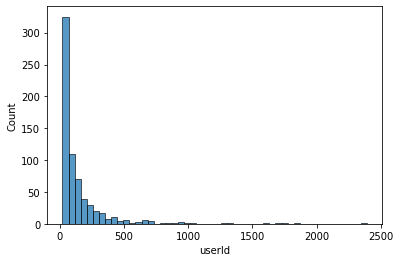

In [47]:
#Lets visulaize the number of ratings per voter i.e. a histogram
sns.histplot(ratings.loc[:,"userId"].value_counts(),bins=50)

Most of them have watched about 100 movies & almost all have watched less 500 movies except a few outliers

Lets ignore the timestamp assuming the viewers interests don't change with time(though this maybe the case as expectations increase after watching few good movies and maybe even a decent movie was giveen a bad rating but let's ignore this aspect)

##Using the Surprise library for collaborative filtering

In [48]:
#Create a reader object and fit it on our ratings dataset
reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [49]:
#Perform SVD and KNN over the train set and test it over the test set and compare the test rmse
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), KNNBaseline()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [50]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

###Lets look at the test rmse of SVD v/s KNN

In [51]:
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.904301,8.825689,0.583207
KNNBaseline,0.904806,0.587118,3.639726


###Lets perform SVD as its test_rmse is marginally lower

In [52]:
algo=SVD()
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

{'fit_time': (4.53439998626709, 9.456140518188477, 12.019136667251587),
 'test_rmse': array([0.9032192 , 0.90165639, 0.90246357]),
 'test_time': (0.5949263572692871, 0.7400717735290527, 0.5366506576538086)}

###Split the data into train and test sets and then predict the users ratings to unseen movies

In [53]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = SVD()
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 0.8992


0.8991900415186981

In [54]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
#Here,uid is user id,iid is movie id rui is rating ,est is estimated rating by this user to this movie
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [55]:
df=df.sort_values(by='uid')

In [56]:
df.head()

,uid,iid,rui,est,details,Iu,Ui,err
5490,1,1293,2.0,3.356047,{'was_impossible': False},17,38,1.356047
9197,1,31,2.5,2.330675,{'was_impossible': False},17,29,0.169325
454,1,1172,4.0,3.472903,{'was_impossible': False},17,32,0.527097
24545,2,590,5.0,3.464412,{'was_impossible': False},59,150,1.535588
7401,2,593,3.0,4.153167,{'was_impossible': False},59,217,1.153167


In [57]:
algo.predict(1, 202, 3)

Prediction(uid=1, iid=202, r_ui=3, est=2.5240832094029915, details={'was_impossible': False})

##Get the top 10 recommendations from collaborative filtering

In [58]:
def get_top_10_recommendations(uid):
  #Takes userId as input
  #And then recommends top 10 movies with best estimated ratings
  #Using SVD
  estimated_ratings=np.zeros(4000)
  for iid in range(4000):
    estimated_ratings[iid]=algo.predict(uid,iid)[3]
  top_indices=estimated_ratings.argsort()[-10:][::-1]
  for idx in range(10):
    print(movies.loc[top_indices[idx],'title'])

Choose the viewer id to recommend movies to

In [59]:
id=348

Lets have a look at his recommended movies

In [60]:
get_top_10_recommendations(id)

Aberdeen
The Shadow
As Good as It Gets
Assassins
Gremlins 2: The New Batch
Shrek
A Thousand Words
Surf's Up
For Greater Glory - The True Story of Cristiada
Krrish


Most of them have watched about 100 movies & almost all have watched less 500 movies excpet a few outliers

Lets ignore the timestamp assuming the viewers interests don't change with time(though this maybe the case as expectations increase after watching few good movies and maybe even a decent movie was giveen a bad rating but let's ignore this aspect)

#Content-based filtering

Content based filtering is more specific to a user as it takes into consideration the viewer's previous activity & ratings given by user to different movies \
The goal is to look at movies the user liked and recommend similar ones based on genre, cast, crew (director, music director etc.), title, tagline etc.

###![](https://i1.wp.com/astig.ph/wp-content/uploads/2016/01/netflix-philippines-catalog.jpg)

##Importing libraries and loading dataset

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
movies=pd.read_csv("/content/drive/MyDrive/movies_data/tmdb_5000_movies.csv/tmdb_5000_movies.csv")
credits=pd.read_csv("/content/drive/MyDrive/movies_data/tmdb_5000_credits.csv/tmdb_5000_credits.csv")
print(movies.shape,credits.shape)

(4803, 20) (4803, 4)


##Data preprocessing & visualization

In [63]:
#rename movie-id to id so as to merge both on the id
credits.rename(columns={"movie_id":"id"},inplace=True)
movies= movies.merge(credits,on='id')
print(movies.shape)

(4803, 23)


In [64]:
relevant_cols=["id","title_x","genres","popularity","vote_average","vote_count","cast","crew","keywords"]
movies=movies.loc[:,relevant_cols]
movies.shape

(4803, 9)

In [65]:
movies.rename(columns={"title_x":"title","vote_average":"rating"},inplace=True)
print(movies.columns)
movies.shape

Index(['id', 'title', 'genres', 'popularity', 'rating', 'vote_count', 'cast',
       'crew', 'keywords'],
      dtype='object')


(4803, 9)

Lets make a note of features which are critical to examining similarity of movies:



1)keywords

2)title

3)genre

4)cast

5)crew

Firstly,let's convert the keywords,title to a bag of words with tokenisation,stop words

In [66]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import random
row_id=int((100*random.random())//1)                          #sample the keywords of this movie
sample=movies.loc[row_id,'keywords']
#split into words
tokens = word_tokenize(sample)
#tokens simply mean that words are broken into their prefixes eg.happiness,happy,happily would all tokenize to happi
# remove all tokens that are not alphabetic(eg.punctuation,numbers etc.)
words = [word for word in tokens if word.isalpha()]
words=list(set(words))
if('id' in words):
  words.remove('id')
if('name' in words):
  words.remove('name')
#Now,lets remove stopwords i.e. common words like I,am,he,it,on etc. which don't contribute much to the meaning of the sentence
stop_words=set(stopwords.words("english"))
filtered_words=[]
for w in words:
  if w not in stop_words:
    filtered_words.append(w)
print("The keywords of the movie:",movies.loc[row_id,'title'],"are",str(filtered_words))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
The keywords of the movie: TRON: Legacy are ['program', 'duel', 'motorcycle', 'light', 'computer', 'dystopia', 'artificial', 'neon', 'autocracy', 'secret', 'deception', 'identity', 'intelligence']


In [67]:
#Now,lets create a function for genreating a list of key_words from the keywords string
def get_keywords(keywords):
  tokens = word_tokenize(keywords.lower())
  #tokens simply mean that words are broken into their prefixes eg.happiness,happy,happily would all tokenize to happi
  #remove all tokens that are not alphabetic(eg.punctuation,numbers etc.)
  words = [word for word in tokens if word.isalpha()]
  words=list(set(words))
  if('id' in words):
    words.remove('id')
  if('name' in words):
    words.remove('name')
  #Now,lets remove stopwords i.e. common words like I,am,he,it,on etc. which don't contribute much to the meaning of the sentence
  stop_words=set(stopwords.words("english"))
  filtered_words=[]
  for w in words:
    if w not in stop_words:
      filtered_words.append(w)
  return filtered_words

def get_title(title):
  tokens = word_tokenize(title.lower())
  #tokens simply mean that words are broken into their prefixes eg.happiness,happy,happily would all tokenize to happi
  #remove all tokens that are not alphabetic(eg.punctuation,numbers etc.)
  words = [word for word in tokens if word.isalpha()]
  words=list(set(words))
  #Now,lets remove stopwords i.e. common words like I,am,he,it,on etc. which don't contribute much to the meaning of the sentence
  stop_words=set(stopwords.words("english"))
  filtered_words=[]
  for w in words:
    if w not in stop_words:
      filtered_words.append(w)
  return filtered_words

#lets test these functions
row_id=int((100*random.random())//1)
print("Title:",movies.loc[row_id,"title"],'| Title(bag of words)',str(get_title(movies.loc[row_id,"title"])),'| keywords(bag of words)',str(get_keywords(movies.loc[row_id,"keywords"])))

Title: Dawn of the Planet of the Apes | Title(bag of words) ['dawn', 'planet', 'apes'] | keywords(bag of words) ['sequel', 'colony', 'plague', 'animal', 'dystopia', 'scientist', 'medical', 'leader', 'ape', 'attack', 'woods', 'forest', 'monkey', 'research']


In [68]:
#The genre and cast are string type first lets make functions to convert them to dictionaries
def process_genre(s):
  id_str=s.split(", ")[0]
  genre_str=s.split(", ")[-1]
  genre={}
  genre["id"]=int(id_str.split(':')[-1])
  genre["name"]=(genre_str.split(':')[-1])[2:-1]
  return genre

def get_genres(s):
  if(len(s)<5):
    return {}
  genres=s.split("}, {")
  genres[0]=genres[0][2:]
  genres[-1]=genres[-1][:-2]
  genre_dicts=[]
  for genre in genres:
    genre_dicts.append(process_genre(genre))
  return genre_dicts

def process_actor(s):
  id_str=s.split(", ")[0]
  actor_str=s.split(", ")[-2]
  actor={}
  actor["id"]=int(id_str.split(':')[-1])
  actor["name"]=(actor_str.split(':')[-1])[2:-1]
  return actor

def get_cast(s):
  if(len(s)<5):
    return {}
  cast=s.split("}, {")
  cast[0]=cast[0][2:]
  cast[-1]=cast[-1][:-2]
  cast_dicts=[]
  for actor in cast:
    cast_dicts.append(process_actor(actor))
  return cast_dicts

def process_crew(s):
  id_str=s.split(", ")[-3]
  job_str=s.split(", ")[-2]
  name_str=s.split(", ")[-1]
  crew={}
  crew["id"]=id_str.split(':')[-1]
  crew["job"]=(job_str.split(':')[-1])[2:-1]
  crew["name"]=(name_str.split(':')[-1])[2:-1]
  return crew

def get_crew(s):
  #only director seems relevant we can safely ignore others like cameraman,producer,dubbing artist etc.
  if(len(s)<5):
    return {}
  crew=s.split("}, {")
  crew[0]=crew[0][2:]
  crew[-1]=crew[-1][:-2]
  crew_dicts=[]
  for crew_member in crew:
    crew_dicts.append(process_crew(crew_member))
  return crew_dicts

In [69]:
#now,lets make cast,genre and crew list

def get_genre_list(s):
  genre_dicts=get_genres(s)
  genre_list=[genre["name"] for genre in genre_dicts]
  return genre_list

def get_cast_list(s):
  cast_dicts=get_cast(s)
  cast_list=[actor["name"] for actor in cast_dicts]
  return cast_list

def get_crew_list(s):
  crew_dicts=get_crew(s)
  crew_list=[crew_member["name"] for crew_member in crew_dicts if crew_member["job"]=="Director"]
  return crew_list

get_crew_list(movies.loc[3,"crew"])

['Christopher Nolan']

Now lets test all these lists for a movie

In [70]:
row_id=int((100*random.random())//1)
print("TITLE:",movies.loc[row_id,"title"])
print("KEYWORDS:",str(get_keywords(movies.loc[row_id,"keywords"])))
print("GENRES:",str(get_genre_list(movies.loc[row_id,"genres"])))
print("CAST:",str(get_cast_list(movies.loc[row_id,"cast"])))
print("DIRECTOR:",str(get_crew_list(movies.loc[row_id,"crew"])))

TITLE: Waterworld
KEYWORDS: ['mutant', 'doomsday', 'water', 'tattoo', 'dystopia', 'ocean']
GENRES: ['Adventure', 'Action']
CAST: ['Kevin Costner', 'Chaim Girafi', 'Rick Aviles', 'R. D. Call', 'Zitto Kazann', 'Jeanne Tripplehorn', 'Dennis Hopper', 'Jack Black', 'Zakes Mokae', 'Jack Kehler', 'Tina Majorino', 'Rita Zohar', 'Gerard Murphy', 'Michael Jeter', 'Kim Coates']
DIRECTOR: ['Kevin Reynolds']


Now,let's develop a similarity measure between any 2 arbitary movies

In [71]:
def get_sim(list1,list2):
  ctr=0
  for ele in list1:
    if ele in list2:
      ctr+=1
  return ctr/len(list1)

def get_similarity(i,j):
  #let's the get the features of movies in row i
  past_title=get_title(movies.loc[i,"title"])
  past_keywords=get_keywords(movies.loc[i,"keywords"])
  past_genres=get_genre_list(movies.loc[i,"genres"])
  past_cast=get_cast_list(movies.loc[i,"cast"])
  past_directors=get_crew_list(movies.loc[i,"crew"])
  #Now,lets get the features of movie at row j
  present_title=get_title(movies.loc[j,"title"])
  present_keywords=get_keywords(movies.loc[j,"keywords"])
  present_genres=get_genre_list(movies.loc[j,"genres"])
  present_cast=get_cast_list(movies.loc[j,"cast"])
  present_directors=get_crew_list(movies.loc[j,"crew"])
  similarity=0
  weights=[5,5,3,10,2]
  similarity+=weights[0]*get_sim(past_title,present_title)
  similarity+=weights[1]*get_sim(past_keywords,present_keywords)
  similarity+=weights[2]*get_sim(past_genres,present_genres)
  similarity+=weights[3]*get_sim(past_cast,present_cast)
  similarity+=weights[4]*get_sim(past_directors,present_directors)
  return similarity/sum(weights)

In [72]:
def get_rowId(movie):
  for row_id in range(movies.shape[0]):
    if(movie==movies.loc[row_id,"title"]):
      return row_id
  return -1

def get_recommendation(watch_history,rating_history=-1):   
  #Here,watch_history is list of previous movies & rating_history is the corresponding rating given by the user(if no rating were given feed -1)
  similarity_scores=np.zeros((movies.shape[0],len(watch_history)))
  rowIds=[]
  for past_movie in watch_history:
    row_id=get_rowId(past_movie)
    if(row_id==-1):
      print(past_movie,"isn't a vaid movie name")
      print("Please,check the movie name,maybe some issue with case or 'the','a' etc.")
      return
    rowIds.append(row_id)
  for idx,past_movie_id in enumerate(rowIds):
    for row_id in range(movies.shape[0]):
      if row_id not in rowIds:
        similarity_scores[row_id,idx]=get_similarity(past_movie_id,row_id)
  cummulative_similarity_score=np.dot(similarity_scores,np.array(rating_history))
  #Recommend movies with Top 10 cummulative similarity scores
  recommended_rowIds=np.flip(cummulative_similarity_score.argsort()[-20:])
  top_movies=movies.loc[recommended_rowIds,:]
  recommendations=list(top_movies.nlargest(10,'popularity').loc[:,'title'])
  print("****TOP PERSONALIZED RECOMMENDATIONS****")
  for idx,movie in enumerate(recommendations):
    print(idx+1,')',movie)

Give a a list of watch history and the corresponding ratings u have given,to get 10 personalised recommendations

In [73]:
n=int(input("How many movies have u rated till now:\n"))
movie_list=[]
rating_list=[]
i=n
while(i>0):
  movie=input("Give {}th movie name:".format(n-i+1))
  rating=int(input("Your rating to this movie:")) #Keep it 1,2,3,4,5
  if(get_rowId(movie)==-1):
    print(movie,"isn't a vaid movie name")
    print("Please,check the movie name,maybe some issue with case or 'the','a' etc.\n")
  else:
    movie_list.append(movie)
    rating_list.append(rating)
    i=i-1
    print('Perfect!!!\n')

print("Plz wait your recommendation are being processed")
get_recommendation(movie_list,rating_list)

How many movies have u rated till now:
0
Plz wait your recommendation are being processed
****TOP PERSONALIZED RECOMMENDATIONS****
1 ) The Age of Adaline
2 ) The Cabin in the Woods
3 ) Southpaw
4 ) Sicario
5 ) Drag Me to Hell
6 ) Corpse Bride
7 ) 30 Days of Night
8 ) Stranger Than Fiction
9 ) Hanna
10 ) The Running Man


Check manually here

In [74]:
get_recommendation(["Hotel Transylvania","Finding Nemo"],[4,3])

****TOP PERSONALIZED RECOMMENDATIONS****
1 ) Minions
2 ) Brave
3 ) Monsters, Inc.
4 ) How to Train Your Dragon 2
5 ) Aladdin
6 ) A Bug's Life
7 ) Cars
8 ) Toy Story 2
9 ) WALL·E
10 ) Ratatouille


Test if the movie names are appropriate here,
For example 'Avengers' is not movie, 'The Avengers'

If rowId is -1 there is some issue with movie name maybe case,'the','a' missing etc.
First check it before feeding as input

In [75]:
get_rowId("Avengers: Age of Ultron")

7

Get some radom movie names here for feeding as input

In [76]:
print(movies.loc[12,"title"])

Pirates of the Caribbean: Dead Man's Chest
